This is my first notebook that I have ever worked after started to learn machine learning and I am glad for any comment or feedback.

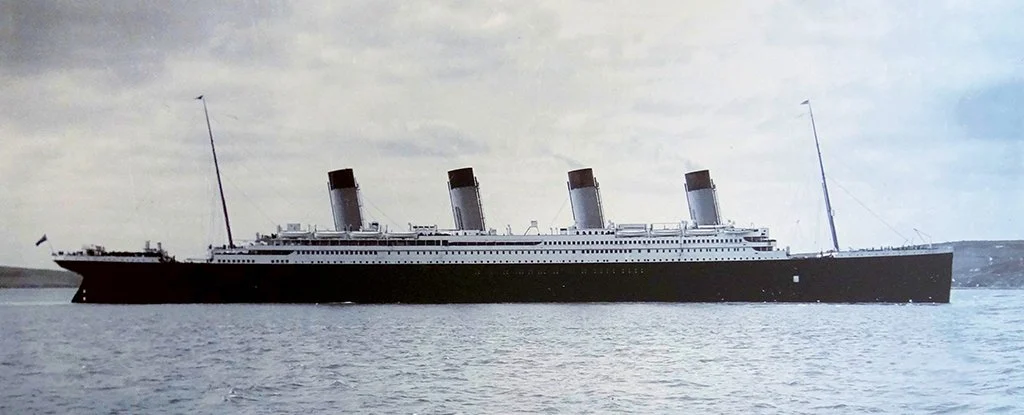


RMS Titanic, British luxury passenger liner that sank on April 14–15, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 passengers and ship personnel. 

One of the most famous tragedies in modern history, it inspired numerous stories, several films, and a musical and has been the subject of much scholarship and scientific speculation.

Firstly, we should import our core libraries that we use to manipulate our data.


# Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

Got the data seperately as train and test. 

We will examine train data and build a model on it. After that, We'll try our model on the test data. 

Let's take the first look with train data.


In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Everything looks as expected. However, it seems there are missing values in numerous features such as Age and Cabin so lets check it how many of them is null.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We are lucky that the data do not have massive null values for many features, so there are 3 outcomes which are about Age, Cabin and Embarked.

**AGE**
1. There are approximately 280 missing values in the Age column that we may complete manually e.g. filling with mean values or median values..

**EMBARKED**
2. For Embarked, it is just 2 so we can either delete or complete them.

**CABIN**
3. As we can see there are huge amount of data are missing in Cabin column; moreover, I may complete them according to right possible values unless it has various values so lets take a look 

Also we can conclude that there are columns that we can use as numerical value instead of string type so that we can get some correlation with survived column. 

I mean columns including object type data.

In [5]:
train["Cabin"].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
D              3
              ..
D50            1
B101           1
E77            1
D7             1
C86            1
Name: Cabin, Length: 147, dtype: int64

147 different values ! It is impossible to complete that much missing data because we can not predict accurately each of them so we just delete the whole column.

Also we can delete PassengerId becuase we can separate them according to their index column, no need to PassengerId.


In [6]:
train.drop("PassengerId",axis=1,inplace=True)

Let's move to first outcome to handle Age's missing values we can use median or mean of the data according to which one will get lower error. 

Here the values.

In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


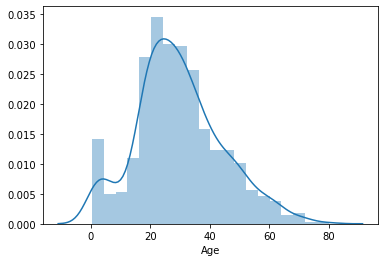

In [8]:
x = train["Age"]
sns.distplot(x)

In [9]:
print(train["Age"].median())
print(train["Age"].mean())
print(train["Age"].mode()[0])

28.0
29.69911764705882
24.0


We can select any of those values to fill age's missing values. 

I'll go with median

In [10]:
median = train["Age"].median()
train["Age"].fillna(median,inplace = True)

For the third outcome, I have to handle Embarked and I can see values of it with countplot.

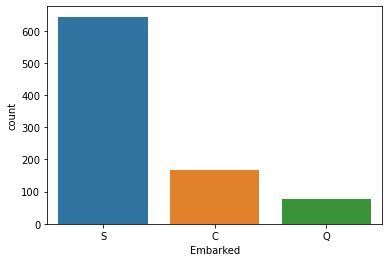

In [11]:
sns.countplot(train["Embarked"])

There are huge amount of S in the column which means S is the mode and It is slightly reasonable that I prefer S to fill missing values of Embarked because S has high probability rather than others.

In [12]:
train["Embarked"].fillna("S",inplace = True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


We got it ! No more missing values that probably give us trouble except Cabin (we'll handle it later)

Now I can use correlation map to see correlation between Survived and others. 

If the number is close to 1, then there is a positive correlation ( if x goes up then y goes up ). 

If the number is close to -1 then there is a negative correlation ( if x goes down then y goes up ). 

In the image below, We can see it.
In addition, we can only see numerical data not string etc.

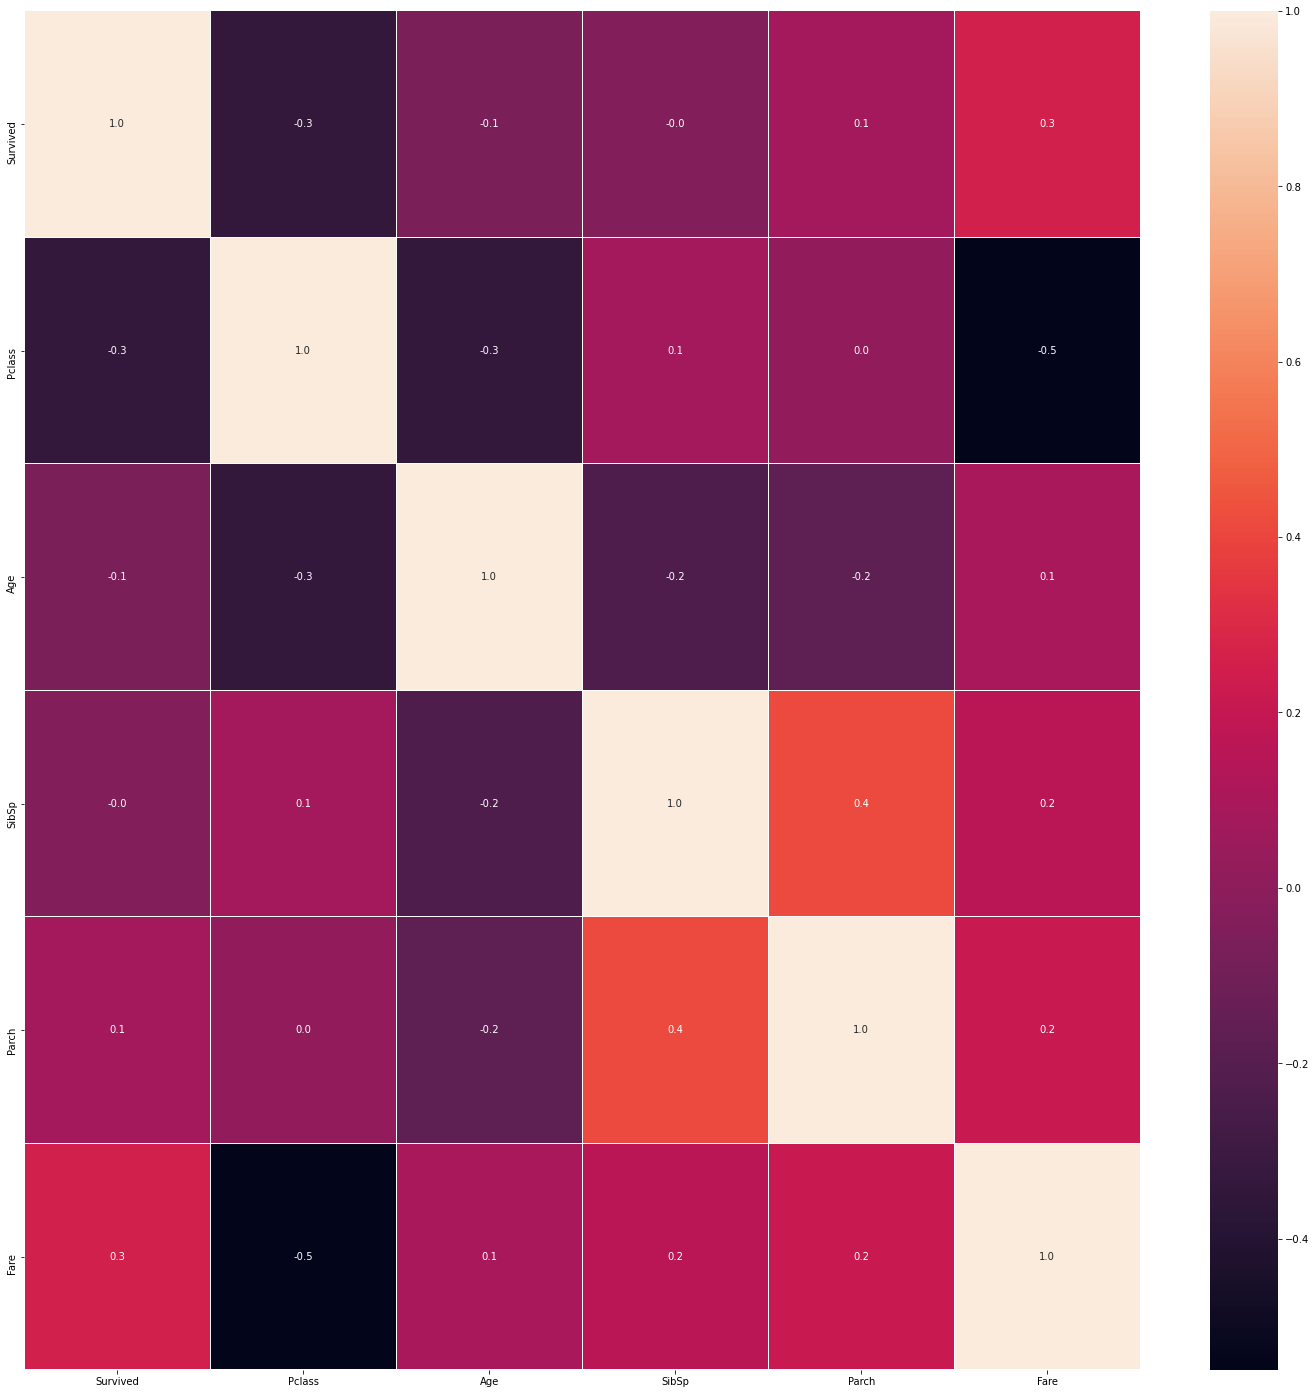

In [14]:
#correlation map
f,ax=plt.subplots(figsize=(25, 25))
sns.heatmap(train.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.show()

Or we can see the correlation just like..

In [15]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending = False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Pclass     -0.338481
Name: Survived, dtype: float64

For instance, Fare and Pclass have bigger correlation with Survived than others; however, It is not that massive correlation because the values are still small (0.25 and -0.33).

Now let's jump to feature engineering before prediction

# Feature Engineering

While I was working on this notebook, I was stuck and I decided to be enlightened about the topic then I watched the Titanic movie and read Titanic's wiki page to acquire knowledge because I had no idea what I'm dealing with.

After that, I learned the most critical thing about Titanic and I used it to get my final result. It was that while evacuation happening, women and children at higher classes (Pclass1 and Pclass2 mostly) were loaded first to lifeboat. In other words, if you are women or children at first or second class, you are survived with high probability.

So far, we filled and dropped some columns and we skimed through the correlation map what we should do next is apply some feature engineering stuff and get the data ready for prediction



Firstly, let's handle categorical variables. My first target is Name and Ticket.

In [16]:
train.loc[:,["Name","Ticket"]]

,Name,Ticket
0,"Braund, Mr. Owen Harris",A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,"Allen, Mr. William Henry",373450
...,...,...
886,"Montvila, Rev. Juozas",211536
887,"Graham, Miss. Margaret Edith",112053
888,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607
889,"Behr, Mr. Karl Howell",111369


What I can get from the name are honorifics and surnames. With surnames and ticket numbers I can create family id

In [17]:
train["Honorific"] = train["Name"].str.split(",",expand = True).iloc[:,1].str.split(".",expand = True).iloc[:,0].str.strip()
train["Honorific"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Lady              1
Don               1
Jonkheer          1
Mme               1
the Countess      1
Capt              1
Name: Honorific, dtype: int64

Top 4 will be enough for prediction purposes that's why I'll do cut rest of them and use only top 4.

In [18]:
train = train.assign(Mr = (train["Honorific"] == "Mr").astype(int))
train = train.assign(Miss = (train["Honorific"] == "Miss").astype(int))
train = train.assign(Mrs = (train["Honorific"] == "Mrs").astype(int))
train = train.assign(Master = (train["Honorific"] == "Master").astype(int))

The Honorific is not needed. Hence, I should just delete it to avoid any kind of redundancy.

In [19]:
train.drop("Honorific",axis=1,inplace=True)

To get family id I use an algorithm to select families uniquely. After that we don't have any job with ticket and name ; therefore, I delete them.


In [20]:
train["Name"] = train["Name"].str.split(",",expand = True)[0]

family = train.loc[:,["Name","Ticket"]]
family["new"] = family["Name"] + family["Ticket"]

train["new"] = train["Name"] + train["Ticket"]
family_unique = family["new"].unique().tolist()
family_id = [i for i in range(1,len(family_unique)+1)]

merge_df = pd.DataFrame(data={"new":family_unique,"FamilyID":family_id})
    
train = train.join(merge_df.set_index("new"), on='new')
train.drop("new",axis=1,inplace=True)
train["FamilyID"].fillna(0,inplace = True)


train.drop(["Name","Ticket"],axis=1,inplace=True)

In [21]:
import plotly.express as px
fig = px.histogram(train, x="Sex", color='Survived', barmode='group',
             height=400)
fig.show()

It can be seen that most of the female survived but it is not coincidence because we already know the women and children first rule; therefore, the graph above is the result of that. We can split it up to more accurate prediction.

In [22]:
train = train.assign(Female = (lambda x: ((x["Sex"] == "female")).astype(int)))
train = train.assign(Male = (lambda x: ((x["Sex"] == "male")).astype(int)))
train.drop("Sex",axis=1,inplace=True)

Firstly, I select Pclass. I know that there are 3 different pclass 1,2 and 3; moreover, I want to observe that which one has most number of survived people and survived/all rate by each class

To see that I can use a stacked barplot from the plotly library


In [23]:
import plotly.express as px

df_for_bar = train.loc[:,["Pclass","Survived"]]
df_for_bar["Survived"].replace({0:"No",1:"Yes"},inplace = True)

fig = px.histogram(df_for_bar, x="Pclass", color='Survived')

fig.update_layout(
    xaxis_title_text='Pclass', 
    yaxis_title_text='Count', 
    bargap = 0.2)
fig.show()

What I see from table above is if you are first class passenger then you have high probability to survive but after that we cannot see which one comes next so we can calculate it directly.

In [24]:
number_rows = train.count()[0]

rates = train[train["Survived"]==1].groupby(["Pclass"]).count().iloc[:,0]

print(rates / number_rows)

Pclass
1    0.152637
2    0.097643
3    0.133558
Name: Survived, dtype: float64


The biggest part of the survived people have first class ticket then third class and second class come accordingly.


Therefore, First class has high probability to survive so our model can predict by just looking whether the passengers possess first class ticket or not. For that reason, It is better to separate Pclass according to their values 1,2 or 3.


In order to make this happen, we can use the famous OneHotEncoder function from sklearn lib.


In [25]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

results = ohe.fit_transform(train["Pclass"].values.reshape(-1,1),).toarray()

train["PClass_1"] = 0
train["PClass_2"] = 0
train["PClass_3"] = 0

train.iloc[:,[10,11,12]] = results
train.iloc[:,[10,11,12]] = train.iloc[:,[10,11,12]].astype(int)

Now we can approach Embarked same as Pclass.


In [26]:
df_for_pie = train[train["Survived"]==1].groupby(["Embarked"]).count()
fig = px.pie(df_for_pie, values='Survived', names=df_for_pie.index, title='Embarked Distribution Among Survived People')
fig.show()

People who survived consist of highly people getting on the ship from S then C and Q come after that

We can split Embarked like Pclass; however, this time we can use different method instead of OneHotEncoder

In [27]:
embarked_three = pd.get_dummies(train["Embarked"])
train = pd.concat([train,embarked_three],axis=1)

train.drop("Embarked",axis=1,inplace=True)

Now we can think about how to use SibSp and and Parch. We can encode 1 if the passenger has any SibSp or Parch value rather than 0. Otherwise, it is zero


In [28]:
train["NoChild"] = train["Parch"].loc[train["Parch"]==0]
train["NoChild"] = train["NoChild"].fillna(1).astype(int)

train["NoSibSp"] = train["SibSp"].loc[train["SibSp"]==0]
train["NoSibSp"] = train["NoSibSp"].fillna(1).astype(int)

How about family size ? It can make a difference


In [29]:
train["FamilySize"] = train["Parch"] + train["SibSp"]

In [30]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Mr,Miss,Mrs,...,Male,PClass_1,PClass_2,PClass_3,C,Q,S,NoChild,NoSibSp,FamilySize
0,0,3,22.0,1,0,7.2500,NaN,1,0,0,...,1,0,0,0,0,0,1,0,1,1
1,1,1,38.0,1,0,71.2833,C85,0,0,1,...,0,0,0,0,1,0,0,0,1,1
2,1,3,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,C123,0,0,1,...,0,0,0,0,0,0,1,0,1,1
4,0,3,35.0,0,0,8.0500,NaN,1,0,0,...,1,0,0,0,0,0,1,0,0,0


Table above is our latest form; however, we will delete reduntant features and then I will use my last trick which is multiplying Age and Fare by Pclass because basically a 30 years old passenger in First class is not equal to another 30 years old passenger in Third class. Since,  evacuation of First class is happened firstly and Second class and Third class come later. By doing so, our model can predict better.

In Fare there are fares that more expensive than prior classes but by multiplacation we can get rid of it in order to expand range between fares for each classes.

In [31]:
fig = px.box(train[train["Fare"] != 512.3292], x="Pclass", y="Fare")
fig.show()

In [32]:
train["Pclass"].replace({1:3,3:1},inplace = True)  
train["Fare"] = train["Fare"] * train["Pclass"]
train["Age"] = train["Age"] * train["Pclass"] 
train["Pclass"].replace({1:3,3:1},inplace = True)  

In [33]:
fig = px.box(train[train["Fare"] < 700], x="Pclass", y="Fare")
fig.show()

Finally, let's drop reduntant features and jump to prediciton part.

In [34]:
train.drop(train.loc[:,["Pclass","Parch","SibSp","Cabin"]],axis=1,inplace=True)

In [35]:
y = train["Survived"].copy()
train.drop("Survived",axis=1,inplace=True)

# Prediction


To split data I used Stratified sampling

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.13,random_state=42)
for train_index,cv_index in split.split(train,y):
    X_train, X_cv = train.loc[train_index], train.loc[cv_index]
    y_train, y_cv = y.loc[train_index], y.loc[cv_index]

To see models prediction accuracy I implemented following function


In [37]:
from sklearn.metrics import accuracy_score
def predict_model(model,X_train,y_train,X_cv,y_cv):
    model.fit(X_train,y_train)
    return accuracy_score(y_train,model.predict(X_train)),accuracy_score(y_cv,model.predict(X_cv))

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

log_reg = LogisticRegression(max_iter=50000)
print("Logistic Regression    Train: "+"   CV:".join(map(str,predict_model(log_reg,X_train,y_train,X_cv,y_cv))))

rnd_clf = RandomForestClassifier()
print("Random Forest Classifier    Train: "+"   CV:".join(map(str,predict_model(rnd_clf,X_train,y_train,X_cv,y_cv))))

svc = svm.SVC(max_iter=50000)
print("Support Vector Machine Classifier    Train: "+"   CV:".join(map(str,predict_model(svc,X_train,y_train,X_cv,y_cv))))

Logistic Regression    Train: 0.8219354838709677   CV:0.7931034482758621
Random Forest Classifier    Train: 0.983225806451613   CV:0.8017241379310345
Support Vector Machine Classifier    Train: 0.6851612903225807   CV:0.6810344827586207


I chose logistic regression because it gave better result on test data.

We need to apply same functions to test data that we applied on train data so I just collect functions above in a function.

In [39]:
train

,Age,Fare,Mr,Miss,Mrs,Master,FamilyID,Female,Male,PClass_1,PClass_2,PClass_3,C,Q,S,NoChild,NoSibSp,FamilySize
0,22.0,7.2500,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1
1,114.0,213.8499,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1
2,26.0,7.9250,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
3,105.0,159.3000,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1
4,35.0,8.0500,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,54.0,26.0000,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
887,57.0,90.0000,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
888,28.0,23.4500,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,3
889,78.0,90.0000,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [40]:
train2 = pd.read_csv("/kaggle/input/titanic/train.csv")

In [41]:
def all_changes(X):
    X["Honorific"] = X["Name"].str.split(",",expand = True).iloc[:,1].str.split(".",expand = True).iloc[:,0].str.strip()
    X = X.assign(Mr = (X["Honorific"] == "Mr").astype(int))
    X = X.assign(Miss = (X["Honorific"] == "Miss").astype(int))
    X = X.assign(Mrs = (X["Honorific"] == "Mrs").astype(int))
    X = X.assign(Master = (X["Honorific"] == "Master").astype(int))
    X.drop("Honorific",axis=1,inplace=True)
    
    X["Name"]=X["Name"].str.split(",",expand = True)[0]
    family = X.loc[:,["Name","Ticket"]]
    family["new"] = family["Name"] + family["Ticket"]
    X["new"] = X["Name"] + X["Ticket"]
    family_unique = family["new"].unique().tolist()
    family_id = [i for i in range(1,len(family_unique)+1)]
    merge_df = pd.DataFrame(data={"new":family_unique,"FamilyID":family_id})
    
    X = X.join(merge_df.set_index("new"), on='new')
    X.drop("new",axis=1,inplace=True)
    X["FamilyID"].fillna(0,inplace = True)
    
    
    X.drop(X.loc[:,["PassengerId","Name","Ticket","Cabin"]],axis=1,inplace=True)
    
    X = X.assign(Female = (lambda x: ((x["Sex"] == "female")).astype(int)))
    X = X.assign(Male = (lambda x: ((x["Sex"] == "male")).astype(int)))
    
    
    
    mean = X["Age"].mean()
    X["Age"].fillna(mean,inplace = True)
       
    
    
    X = X.assign(P_1 = (X["Pclass"]== 1).astype(int))
    X = X.assign(P_2 = (X["Pclass"]== 2).astype(int))
    X = X.assign(P_3 = (X["Pclass"]== 3).astype(int))
    
    X["Embarked"].fillna("S",inplace = True)
    
    X = X.assign(C = (X["Embarked"]=="C").astype(int))
    X = X.assign(Q = (X["Embarked"]=="Q").astype(int))
    X = X.assign(S = (X["Embarked"]=="S").astype(int))
        

    X["NoChild"] = X["Parch"].loc[X["Parch"]==0]
    X["NoSibSp"] = X["SibSp"].loc[X["SibSp"]==0]
    
    X["NoChild"] = X["NoChild"].fillna(1).astype(int)
    X["NoSibSp"] = X["NoSibSp"].fillna(1).astype(int)
    

    X["FamilySize"] = X["Parch"] + X["SibSp"]
  
 # - - --- - - - - - - -- - - - - - -- - - - -- - - - - -- - - - - - - -- - - - - - -
    X["Pclass"].replace({1:3,3:1},inplace = True)
    
    X["Fare"] = X["Fare"] * X["Pclass"]
    X["Age"] = X["Age"] * X["Pclass"] 
    
    X.rename(columns={"P_1":"PClass_1","P_2":"PClass_2","P_3":"PClass_3"},inplace=True)

    X.drop(X.loc[:,["Sex","Embarked","Pclass","Parch","SibSp"]],axis=1,inplace=True)
    return X


train2 = all_changes(train2)

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We had missing values in Cabin and Age same as train but we have only one row that does not have Fare value unlike train data. We can fill it and then use function we just implemented to finalize.

In [43]:
test["Fare"].fillna(11,inplace = True)
test = all_changes(test)

In [44]:
test.head()

,Age,Fare,Mr,Miss,Mrs,Master,FamilyID,Female,Male,PClass_1,PClass_2,PClass_3,C,Q,S,NoChild,NoSibSp,FamilySize
0,34.5,7.8292,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0
1,47.0,7.0000,0,0,1,0,2,1,0,0,0,1,0,0,1,0,1,1
2,124.0,19.3750,1,0,0,0,3,0,1,0,1,0,0,1,0,0,0,0
3,27.0,8.6625,1,0,0,0,4,0,1,0,0,1,0,0,1,0,0,0
4,22.0,12.2875,0,0,1,0,5,1,0,0,0,1,0,0,1,1,1,2


In [45]:
X_train.head()

,Age,Fare,Mr,Miss,Mrs,Master,FamilyID,Female,Male,PClass_1,PClass_2,PClass_3,C,Q,S,NoChild,NoSibSp,FamilySize
556,144.0,118.8000,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1
494,21.0,8.0500,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
754,96.0,130.0000,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,3
668,43.0,8.0500,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
552,28.0,7.8292,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


Both dataframe are same according to their column order. 

In [46]:
test_result = log_reg.predict(test)
test_result = test_result.reshape(-1,1)

result = pd.DataFrame(data = {"PassengerId":np.arange(892,1310,1)})
result["Survived"]= test_result
result.to_csv(r'result.csv',index = False, header=True)

It is the end ! Thanks for your precious comments and feedbacks..